# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [45]:
# Combine the data into a single dataset
combined_study = pd.merge(mouse_metadata,study_results,on='Mouse ID')
# Display the data table for preview
combined_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [46]:
# Checking the number of mice.
len(combined_study['Mouse ID'].unique())

249

In [47]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice_df = combined_study.loc[combined_study.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
# Optional: Get all the data for the duplicate mouse ID.
print(duplicated_mice_df)

#Creating a list of duplicated mice
duplicate_mice = duplicated_mice_df['Mouse ID'].unique().tolist()
print(duplicate_mice)


    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [48]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_study[combined_study['Mouse ID'].isin(duplicate_mice) == False]

In [49]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(clean_df['Mouse ID'].unique())
print(mouse_count)

248


## Summary Statistics

In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
clean_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
clean_median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
clean_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
clean_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
clean_sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
vol_stats = ['clean_mean','clean_median','clean_var','clean_stedv','clean_sem']
tumor_volume_stats = pd.DataFrame({'Mean': clean_mean,'Median': clean_median, 'Variance': clean_var,'Standard Deviation': clean_std,'SEM': clean_sem})
tumor_volume_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
tumor_agg = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
tumor_agg



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Total Timepoints per Regimen'}, xlabel='Drug Name', ylabel='Timepoints'>

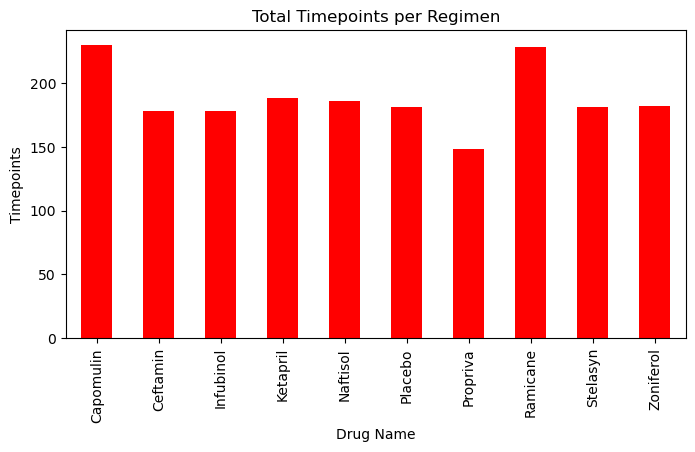

In [65]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_counts = clean_df.groupby('Drug Regimen')['Timepoint'].count()
regimen_counts.plot(kind='bar',figsize = (8,4),title='Total Timepoints per Regimen',xlabel='Drug Name',ylabel='Timepoints',color='red')

Text(0, 0.5, '# of Timepoints')

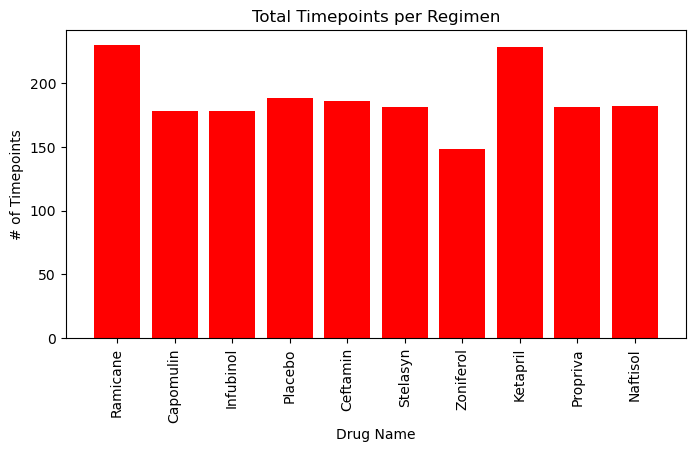

In [64]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(clean_df['Drug Regimen'].unique()))
tick_locs = [value for value in x_axis]
plt.figure(figsize=(8,4))
plt.bar(x_axis, regimen_counts, color='red', align='center')
plt.xticks(tick_locs,clean_df['Drug Regimen'].unique().tolist(),rotation=90)
plt.title('Total Timepoints per Regimen')
plt.xlabel('Drug Name')
plt.ylabel('# of Timepoints')

array([<AxesSubplot:ylabel='Sex'>], dtype=object)

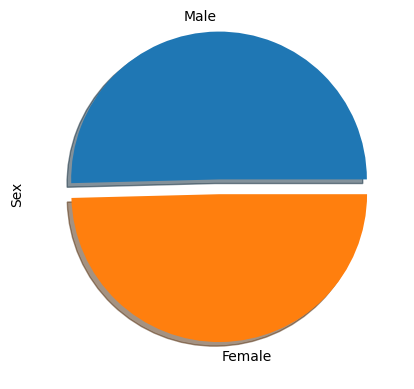

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df.drop_duplicates(['Mouse ID']).Sex.value_counts().plot.pie(subplots=True, explode=[.1,0],shadow=True)

([<matplotlib.patches.Wedge at 0x269bd302370>,
 [Text(-0.01520083372288487, 1.1999037189100337, 'Males'),
  Text(0.013934097579310996, -1.0999117423341975, 'Females')])

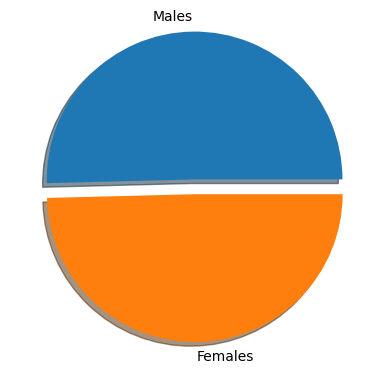

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
males = len(clean_df.loc[clean_df['Sex'] == 'Male']['Mouse ID'].unique())
females = mouse_count - males
sexes = [males,females]
labels = ['Males','Females']
explode = (.1,0)
plt.pie(sexes, explode = explode, labels = labels, shadow=True)



## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
sliced_df = clean_df.loc[clean_df['Drug Regimen'].isin(regimens),:]
final_tpf_df = sliced_df.sort_values(['Mouse ID', 'Timepoint'], ascending=False).drop_duplicates(['Mouse ID'],keep='first')
final_tpf_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
84,z578,Ramicane,Male,11,16,45,30.638696,0
1855,y865,Ceftamin,Male,23,26,45,64.729837,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
...,...,...,...,...,...,...,...,...
430,a444,Ramicane,Female,10,25,45,43.047543,0
327,a411,Ramicane,Male,3,22,45,38.407618,1
493,a275,Ceftamin,Female,20,28,45,62.999356,3
473,a251,Infubinol,Female,21,25,45,65.525743,1


Regimen: Capomulin
    IQR: 7.78
    Upper Bound: 51.83
    Lower Bound : 20.7
    Outliers: []
Regimen: Ramicane
    IQR: 9.1
    Upper Bound: 54.31
    Lower Bound : 17.91
    Outliers: []
Regimen: Infubinol
    IQR: 11.48
    Upper Bound: 82.74
    Lower Bound : 36.83
    Outliers: ['c326']
Regimen: Ceftamin
    IQR: 15.58
    Upper Bound: 87.67
    Lower Bound : 25.36
    Outliers: []


Text(0.5, 1.0, 'Final Timepoints of Regimens')

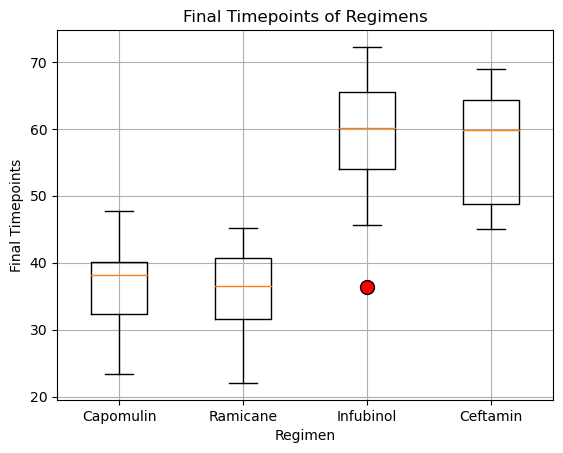

In [77]:
# Put treatments into a list for a for loop (and later for plot labels)
data={}
outliers_df = pd.DataFrame(columns = final_tpf_df.columns)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes 
# add subset 
# Determine outliers using upper and lower bounds 
for regimen in regimens:
    data.update({regimen: final_tpf_df.loc[final_tpf_df['Drug Regimen'] == regimen,'Tumor Volume (mm3)']})
    quartiles = data[regimen].quantile([.25,.5,.75])
    iqr = quartiles[.75] - quartiles[.25]
    lowerbound = quartiles[.25] - (1.5*iqr)
    upperbound = quartiles[.75] + (1.5*iqr)
    local_outliers = final_tpf_df.loc[(final_tpf_df['Drug Regimen'] == regimen) & ((final_tpf_df['Tumor Volume (mm3)'] < lowerbound) | (final_tpf_df['Tumor Volume (mm3)'] > upperbound))]
    outliers_list = local_outliers['Mouse ID'].to_list()
    outliers_df = pd.concat([outliers_df,local_outliers])
    print(f'Regimen: {regimen}\n    IQR: {round(iqr,2)}\n    Upper Bound: {round(upperbound,2)}\n    Lower Bound : {round(lowerbound,2)}\n    Outliers: {outliers_list}')

In [59]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
flierprops = dict(marker='o', markerfacecolor='red', markersize=10, linestyle='none')
ax.boxplot(data.values(), flierprops = flierprops)
plt.grid()
ax.set_xticklabels(data.keys())
ax.set_xlabel('Regimen')
ax.set_ylabel('Final Timepoints')
ax.set_title('Final Timepoints of Regimens')

## Line and Scatter Plots

<AxesSubplot:title={'center':'Timepoint vs Tumor Volume for Mouse l897(Capomulin Regimen)'}, xlabel='Timepoint', ylabel='Tumor Volume'>

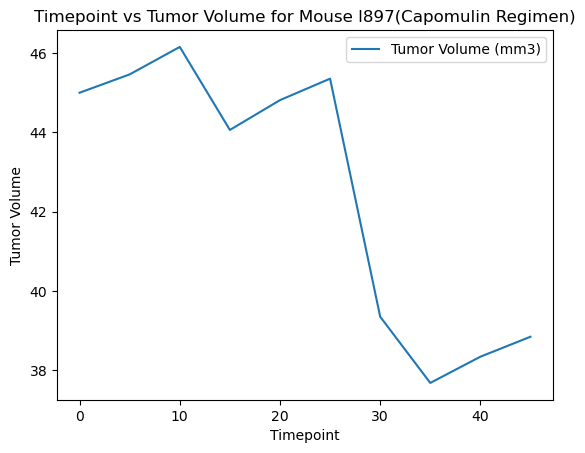

In [79]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = 'l897'
cap_mouse_data = clean_df.loc[clean_df['Mouse ID'] ==  cap_mouse].sort_values('Timepoint')
cap_mouse_data.plot(x = 'Timepoint',y='Tumor Volume (mm3)',ylabel='Tumor Volume',title='Timepoint vs Tumor Volume for Mouse l897(Capomulin Regimen)')

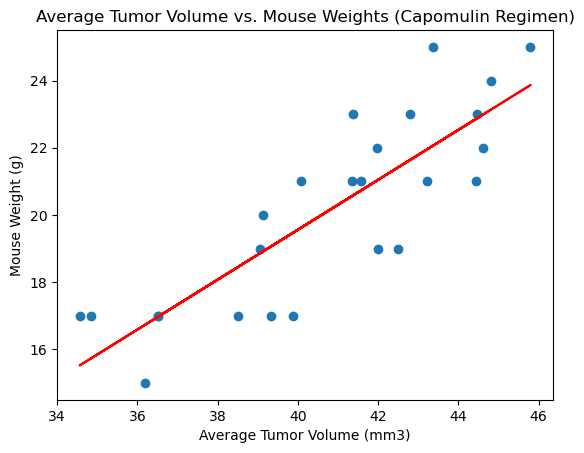

The Pearson correlation coefficiant is 0.841936342469472.
   This indicates a strong positive correlation between Tumor Volume and Mouse Weight on the Capomulin Regimen.


In [88]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cap_mice_df = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
cap_avg_vol = cap_mice_df.groupby('Mouse ID').mean('Tumor Volume (mm3)')
volumes = cap_avg_vol.iloc[:,3]
weights = cap_avg_vol.iloc[:,1]
correlation = st.pearsonr(volumes,weights)
(slope, intercept, rvalue, pvalue, stderr) = linregress(volumes, weights)
regress_values = volumes * slope + intercept
plt.scatter(volumes,weights)
plt.plot(volumes,regress_values, color='red')
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
plt.title('Average Tumor Volume vs. Mouse Weights (Capomulin Regimen)')
plt.show()
print(f'The Pearson correlation coefficiant is {correlation.statistic}.\n   This indicates a strong positive correlation between Tumor Volume and Mouse Weight on the Capomulin Regimen.')

## Correlation and Regression